In [1]:
import sys
sys.path.append('..')
from lib import *
import pandas as pd
import numpy as np

In [2]:
lsa_np = np.load('../lsa_output.npy')

In [3]:
metadata = pd.read_pickle('../data/parsed/pickles/pickled_data_test.pickle')
metadata = metadata.loc[metadata['Scenario'] == '401']
metadata = metadata.reset_index(drop=True)

In [4]:
lsa_df = pd.DataFrame(lsa_np)

In [5]:
df = pd.concat([metadata, lsa_df], axis=1, join_axes=[metadata.index])
df = df.loc[df['Label'] != '-1']
df = df.reset_index(drop=True)

In [6]:
cat_features = ['To','From']
features = list(range(100))
features.extend(cat_features + ['Date'])

df = df[features + ['Label']]

In [7]:
#__init__(self, train_data, n_trees, tree_depth, random_seed, n_max_features, n_max_input):
n_trees = 64
tree_depth = 50
random_seed = 42
n_max_features = 11
n_max_input = df.shape[0]
benchmark = None
rows = range(df.shape[0])

# tree = Tree(df, tree_depth, benchmark, rows, features, cat_features)
# tree.fit()
#train_data, n_trees, tree_depth, random_seed, n_max_features, n_max_input, cat_features):
forest = RNF(df, n_trees, tree_depth, random_seed, n_max_features, n_max_input, cat_features)
forest.fit()

fitting the 1th tree.


KeyError: '59'

In [8]:
#data, rows, features, depth, max_depth, cat_features
n = Node(df, [162, 162, 655], [58,24],9,50,['From','To'])
n.split()

bgtf: 2
bgtf: 2
feature we used: -999
features we might have used: [58, 24]
rows we have: [162, 162, 655]
Depth: 9


UnboundLocalError: local variable 'left_features' referenced before assignment

In [19]:
df.loc[162]['Message-Contents']

'We will be releasing new version of the Stack Manager and the EnronOnline website tonight . The following are the changes\n\n1. Changes to Stack Manager:\n\n1.1 Changes to toolbar icons:\nTo facilitate further development of the system, it has been found necessary to change the toolbar icons at the top of the Stack  Manager. The attached file shows the old icon and its new replacement. Next to each image below is the description of the function that is executed as well as the short cut key that is mapped to the same function:\n\n \n\n1.2 New Functionality - Auto Suspend\nThe Auto Suspend function allows traders to set an absolute price change from a price level at which you would like the system to automatically suspend a specific product. This function is useful if your products use automatic price resets.\n\nTo activate this feature:\n1. Select a product and click on Product Properties\n2. Check the Enable box\n3. Enter the Price Check and Suspend at +/- values\n4. Click Update\nExa

In [20]:
df['Message-Contents'][655]

'We will be releasing new version of the Stack Manager and the EnronOnline website tonight . The following are the changes\n\n1. Changes to Stack Manager:\n\n1.1 Changes to toolbar icons:\nTo facilitate further development of the system, it has been found necessary to change the toolbar icons at the top of the Stack  Manager. The attached file shows the old icon and its new replacement. Next to each image below is the description of the function that is executed as well as the short cut key that is mapped to the same function:\n\n \n\n1.2 New Functionality - Auto Suspend\nThe Auto Suspend function allows traders to set an absolute price change from a price level at which you would like the system to automatically suspend a specific product. This function is useful if your products use automatic price resets.\n\nTo activate this feature:\n1. Select a product and click on Product Properties\n2. Check the Enable box\n3. Enter the Price Check and Suspend at +/- values\n4. Click Update\nExa

In [31]:
forest.trees[1].visualize()

'digraph Tree {\nnode [shape=box];\n9697354961 [label="X[38] < -0.031301789942907124\ngini = 0.41422474254008784\nsamples = 710\ndistribution = [323, 387]"];\n9309500117 [label="X[46] < -0.005638470551312307\ngini = 0.35528872644819093\nsamples = 323\ndistribution = [213, 110]"];\n9697354961 -> 9309500117 [labeldistance=8, labelangle=30, xlabel="True"]\n8370987661 [label="X[19] < -0.017962402325839743\ngini = 0.34150592253114537\nsamples = 387\ndistribution = [146, 241]"];\n9697354961 -> 8370987661 [labeldistance=8, labelangle=-30, xlabel="False"]\n6320115677 [label="X[42] < 0.05573597938970554\ngini = 0.21427054791057898\nsamples = 213\ndistribution = [199, 14]"];\n9309500117 -> 6320115677 [labeldistance=8, labelangle=30, xlabel="True"]\n2699887270 [label="X[74] < -0.001369698347836301\ngini = 0.3921038961038962\nsamples = 110\ndistribution = [75, 35]"];\n9309500117 -> 2699887270 [labeldistance=8, labelangle=-30, xlabel="False"]\n5296710795 [label="X[46] < 0.0017351779010191084\ngini 

In [32]:
%%bash 
cd vis
# mac xargs syntax seems different from linux
ls *.dot | xargs -I '{}' dot '{}' -Tpng -O
ls *.dot | xargs -I '{}' dot '{}' -Tsvg -O
dot -Tpng tree.dot -o tree.png
dot -Tsvg tree.dot -o tree.svg

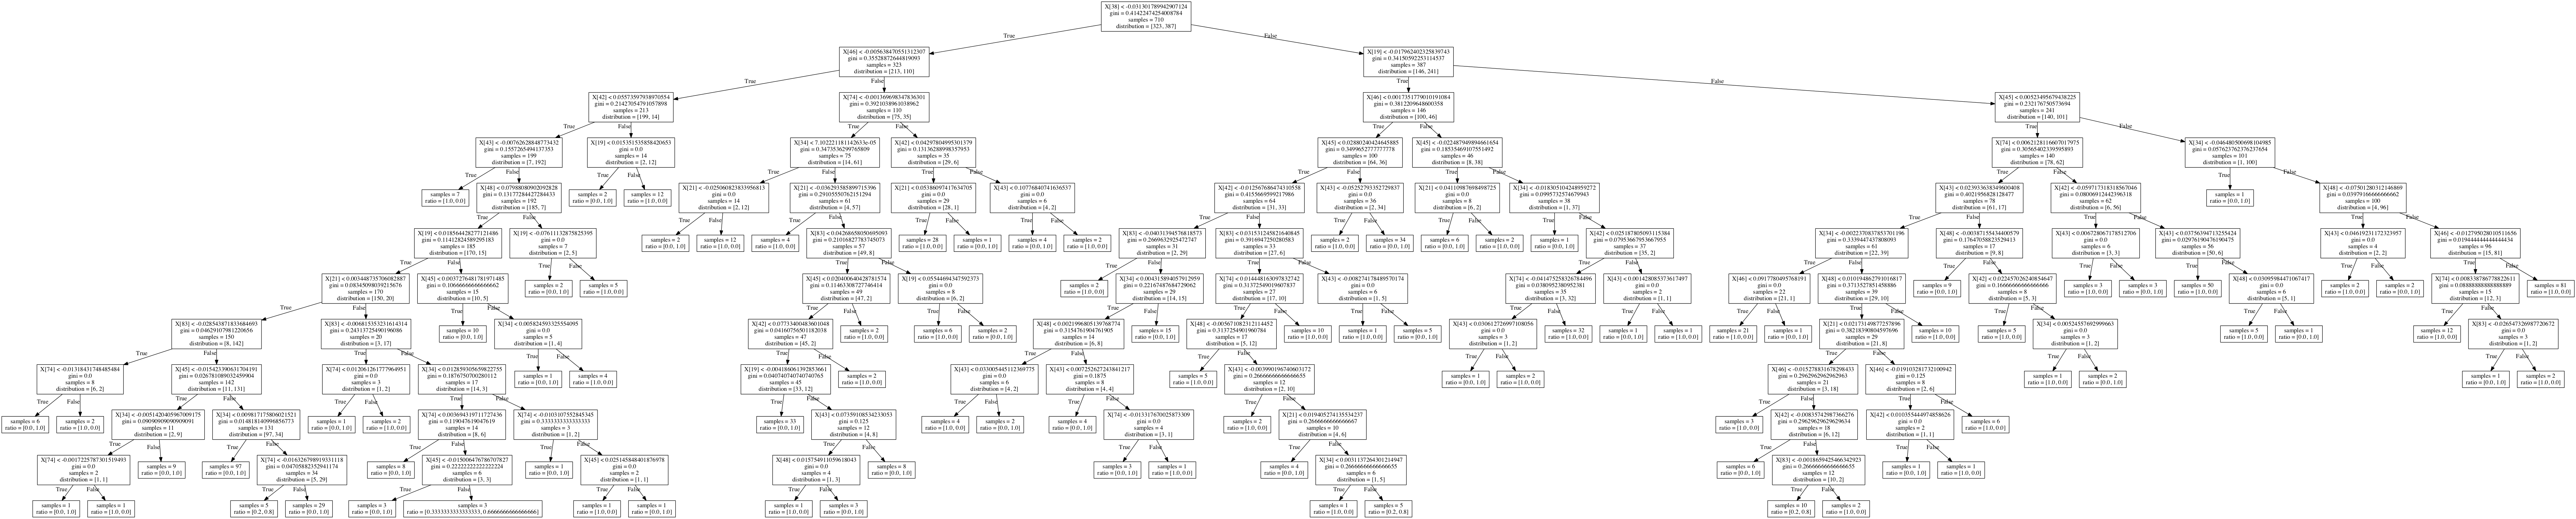

In [33]:
from IPython.display import Image
Image(filename='vis/tree.png')

In [10]:
type(df.columns.values[0])

int